## 代码说明：将聚类后的灰度图与labelme的json文件相互转化，其中灰度图的每一个像素都是整数值，代表了相关的类别

In [46]:
import numpy as np
import json
import cv2
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [39]:
# 示例灰度图
gray_image = np.array([
    [0, 1, 1, 1, 1],
    [2, 0, 1, 1, 1],
    [2, 0, 2, 1, 2],
    [0, 0, 2, 2, 2],
    [0, 0, 2, 2, 2],
], dtype=np.uint8)

# 假设类别映射字典，将整数值映射到标签名称
class_mapping = {
    0: "background",
    1: "tea",
    2: "impurity",
    # 添加更多的类别映射
}

In [40]:
# 将灰度图转换为 LabelMe 格式
def gray_to_labelme(gray_image, class_mapping):
#     gray_image = cv2.imread(gray_image_root)
#     gray_image = np.array(gray_image)

    height, width = gray_image.shape
    labelme_data = {
        "version": "5.3.1",
        "flags": {},
        "shapes": [],
        "imagePath": gray_image,  # 请替换成实际的图像文件名
        "imageData": None,
        "imageHeight": height,
        "imageWidth": width
    }

    for label_value, label_name in class_mapping.items():
        if label_name == "background":
            continue

        mask = (gray_image == label_value).astype(np.uint8)
        print(mask)
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for contour in contours:
            points = contour.squeeze().tolist()
            shape_data = {
                "label": label_name,
                "points": points,
                "group_id": None,
                "shape_type": "polygon",
                "flags": {},
            }
            labelme_data["shapes"].append(shape_data)
    
    # 将数据保存为JSON文件
#     with open('labelme_data.json', 'w') as json_file:
#         json.dump(labelme_data, json_file)
        
    return labelme_data

In [41]:
# 示例转换
labelme_data = gray_to_labelme(gray_image, class_mapping)
print(labelme_data)

[[0 1 1 1 1]
 [0 0 1 1 1]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 0 1]
 [0 0 1 1 1]
 [0 0 1 1 1]]
{'version': '5.3.1', 'flags': {}, 'shapes': [{'label': 'tea', 'points': [[1, 0], [3, 2], [4, 1], [4, 0]], 'group_id': None, 'shape_type': 'polygon', 'flags': {}}, {'label': 'impurity', 'points': [[2, 2], [2, 4], [4, 4], [4, 2], [3, 3]], 'group_id': None, 'shape_type': 'polygon', 'flags': {}}, {'label': 'impurity', 'points': [[0, 1], [0, 2]], 'group_id': None, 'shape_type': 'polygon', 'flags': {}}], 'imagePath': array([[0, 1, 1, 1, 1],
       [2, 0, 1, 1, 1],
       [2, 0, 2, 1, 2],
       [0, 0, 2, 2, 2],
       [0, 0, 2, 2, 2]], dtype=uint8), 'imageData': None, 'imageHeight': 5, 'imageWidth': 5}


In [45]:
def labelme_to_gray(labelme_json_root):
    """
    读取labelme生成的json文件，然后转化成灰度图，灰度图中的数值代表像素点所属的类别
    """
    # # 1. 解析LabelMe标注文件（JSON格式）
    with open(labelme_json_root, 'r') as json_file:
        labelme_data = json.load(json_file)

    # 2. 获取图像尺寸
    image_width = labelme_data['imageWidth']
    image_height = labelme_data['imageHeight']

    # 3. 创建灰度图
    gray_image = Image.new('L', (image_width, image_height), 0)

    # 4. 为每个对象分配类别值
    category_mapping = {}  # 用于将类别名称映射到整数值
    category_id = 1

    for shape in labelme_data['shapes']:
        print(shape)
        category_name = shape['label']
        if category_name not in category_mapping:
            category_mapping[category_name] = category_id
            category_id += 1

        category_value = category_mapping[category_name]
        if isinstance(shape['points'][0], list):
        # 创建多边形的坐标列表
            polygon_points = [(int(x), int(y)) for x, y in shape['points']]

            # 使用PIL的绘图功能填充多边形区域
            draw = ImageDraw.Draw(gray_image)
            draw.polygon(polygon_points, fill=category_value)
    # 5. 保存灰度图
    gray_image = np.array(gray_image)
    gray_image = Image.fromarray(gray_image)
    # gray_image.save('output_gray_image.png')
    return gray_image

{'label': '1', 'points': [[458.48275862068976, 849.0], [379.1724137931035, 995.5517241379312], [342.9655172413793, 1228.3103448275863], [482.6206896551723, 1574.8620689655172], [674.0, 1309.344827586207], [596.4137931034484, 1054.1724137931035]], 'group_id': None, 'description': '', 'shape_type': 'polygon', 'flags': {}}
{'label': '2', 'points': [[792.9655172413793, 974.8620689655172], [675.7241379310344, 1102.448275862069], [570.5517241379312, 1362.7931034482758], [699.8620689655172, 1626.5862068965519], [917.1034482758621, 1285.2068965517242]], 'group_id': None, 'description': '', 'shape_type': 'polygon', 'flags': {}}
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
gray_image = np.array([
    [0, 1, 1, 1, 1],
    [2, 0, 1, 1, 1],
    [0, 0, 2, 1, 2],
    [0, 0, 2, 2, 2],
    [0, 0, 2, 2, 2],
], dtype=np.uint8)

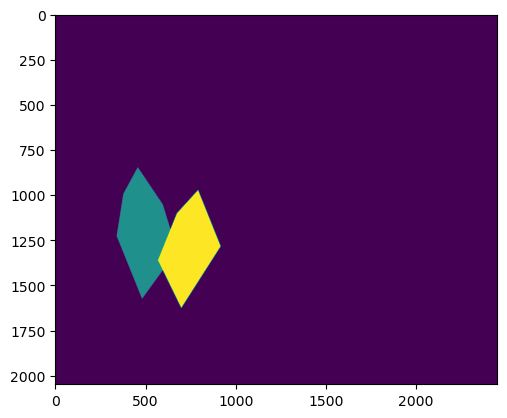

In [48]:
a = plt.imread('output_gray_image.png')
plt.imshow(a)

In [4]:
class_mapping = {
    "background":0,
    "tea":1,
    2: "impurity",
    # 添加更多的类别映射
}

In [5]:
class_mapping['tea']

1